In [1]:
"""
This notebook generates the log L2 ref - alt plots for tiQTLs (Fig. 3A).
For example track and DeepSHAP plots, please see the example tracks directory.
"""

'\nThis notebook generates the log L2 ref - alt plots for tiQTLs (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Load data

composite = np.log10(
    pd.read_csv(
        os.path.join("data/tiqtl", "tiqtls_l2_scores_ref_model.csv.gz"),
        index_col=0
    ) 
    + 1e-3
)

In [4]:
(composite.pred == np.log10(1e-3)).mean()

0.15390279823269515

In [5]:
LinearRegression().fit(
    composite.pred.to_numpy().reshape(-1, 1),
    composite.expt.to_numpy().reshape(-1, 1)
).coef_

array([[0.21518723]])

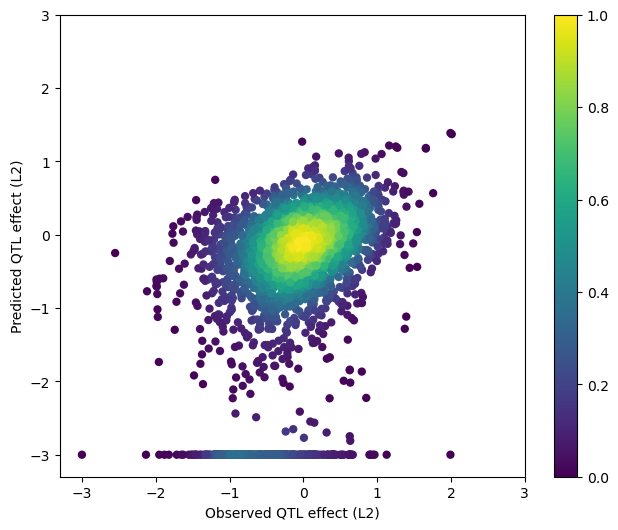

In [21]:
# Plot composite log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.3, 3)
ax.set_ylim(-3.3, 3)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)

plt.savefig("img/tiqtl_composite_l2.pdf")

In [6]:
print(pearsonr(composite.expt, composite.pred))
print(spearmanr(composite.expt, composite.pred))

PearsonRResult(statistic=0.38420242341442834, pvalue=2.984101104790456e-96)
SignificanceResult(statistic=0.41697878794973486, pvalue=9.953143918888139e-115)
